In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy import stats

In [1]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('allegro/herbert-base-cased')
bert_model = AutoModel.from_pretrained("allegro/herbert-base-cased")

/home/aga/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
Some weights of the model checkpoint at allegro/herbert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.sso.sso_relationship.bias', 'cls.sso.sso_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a mo

In [4]:
#Takes great care of ą, ę (if they are set na a/e), fixes spelling considering context , BUT it skipps  ć i ś 
#tere's an option to use spac typos
import spacy
import pl_core_news_sm
def SpellContextCheck(df):
    nlp = spacy.load("pl_core_news_sm")
    for item in [f'nlp_{i}' for i in range(2, 6)]:
       
         text_data = df[item].apply(lambda x:nlp(x))
       
         print(text_data)
    return df
DATASET_CHECK='NLP_BRUDNA.xlsx'
df = pd.read_excel(io=DATASET_CHECK)
df= SpellContextCheck(df)
# df.to_excel('NLP_BRUDNA.xlsx', index=False)
# df = pd.read_excel(io=DATASET_CHECK)
# print(df.iloc[0])

0      (Się, wyluzowac, ., Się, uspokoic, ., Lubię, g...
1      (Relaks, ., Zabicie, nudy, ., Rozrywka, ., Ode...
2      (Relaks, ., Rozrywka, ., Strata, czasu, ., Ryw...
3      (Odstresowac, ., Spędzić, czas, ., Można, zabi...
4      (Rozrywka, ., Motoryka, ., Myślenie, logiczne,...
                             ...                        
517    (Jest, obojętne, ., Relaks, ., Rozrywka, ., Zw...
518    (Rozwijają, umysł, ., Zakłócają, nudę, ., Zabi...
519    (Kontakt, ze, znajomymi, ., Tracenie, czasu, ....
520    (Logiczne, myślenie, ., Doskonalą, refleks, .,...
521    (Malo, snu, ., Koncentracja, ., Złość, bliskic...
Name: nlp_2, Length: 522, dtype: object
0      (Marudzenie, ., Nuda, ., Niezadowolenie, ., St...
1           (Wcale, nie, wpływa, ,, kiedy, nie, gram, .)
2      (Pustka, ., Bezsens, ., Beznadzieja, ., Nuda, ...
3      (Brak, wpływu, ., Czasem, ., Myślę, ., Ze, trz...
4                                       (Nie, wpływa, .)
                             ...                

In [7]:
#MAKES A LOT OF MISTAKES trying to fix the spelling without context, writes up the wrong words
#BUT it fixes words including ć i ś 
from autocorrect import Speller
def spellCheck(df, spell):
    for item in [f'nlp_{i}' for i in range(2, 6)]:
        #  text_data = df[item].str
         text_data = df[item].apply(lambda x: spell(x))
        #  text_data=spell(text_data)
         print(text_data)
    return df

spell = Speller('pl')
# DATASET_CHECK='NLP_BRUDNA.xlsx'
# df = pd.read_excel(io=DATASET_CHECK)
df= spellCheck(df, spell)
df.to_excel('NLP_BRUDNA.xlsx', index=False)
df = pd.read_excel(io=DATASET_CHECK)
print(df.iloc[0])

0      Się wyluzować. Się uspokoić. Lubię grac. Satys...
1      Relaks. Zabicie nudy. Rozrywka. Oderwanie. Roz...
2      Relaks. Rozrywka. Strata czasu. Rywalizacja. S...
3      Odstresowac. Spędzić czas. Można zabic nudę. Z...
4      Rozrywka. Motoryka. Myślenie logiczne. Nowa wi...
                             ...                        
517    Jest obojętne. Relaks. Rozrywka. Zwalczanie nu...
518    Rozwijają umysł. Zakłócają nudę. Zabierają cza...
519    Kontakt ze znajomymi. Tracenie czasu. Gorsze z...
520    Logiczne myślenie. Doskonale refleks. Nauka ję...
521    Malo snu. Koncentracja. Złość bliskich. Brak c...
Name: nlp_2, Length: 522, dtype: object
0      Marudzenie. Nuda. Niezadowolenie. Stefanie. Ro...
1                     Wcale nie wpływa, kiedy nie gram. 
2        Pustka. Bezsens. Beznadzieja. Nuda. Samotność. 
3       Brak wpływu. Czasem. Myślę. Ze trzeba. Łagrach. 
4                                           Nie wpływa. 
                             ...                

In [3]:
X_string = 'nlp_2', 'nlp_3', 'nlp_4', 'nlp_5'
Y_string = 'GDT_score'
DATASET = 'NLP_CLEAN.xlsx'

In [4]:
def del_short_responses(df):
    print(len(df))

    for item in [f'nlp_{i}' for i in range(2, 6)]:
        df = df[df[item].apply(lambda x: len(x) > 10)]
        print(len(df))

    return df

In [9]:

df = pd.read_excel(io=DATASET)
df = df[df['time'] > 300]
df = df[df['label'] != 1]
df = del_short_responses(df)

469
468
460
449
433


In [10]:
df_pilot = pd.read_excel('NLP_PILOT.xlsx')
df_pilot = del_short_responses(df_pilot)

FileNotFoundError: [Errno 2] No such file or directory: 'NLP_PILOT.XLSX'

In [7]:
from typing import Callable, List, Optional, Tuple
from sklearn.base import TransformerMixin, BaseEstimator
import torch
from IPython.display import clear_output
import pandas as pd

class BertTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, bert_tokenizer, bert_model, max_length):

        self.bert_tokenizer = bert_tokenizer
        self.bert_model = bert_model
        self.bert_model.eval()
        self.max_length = max_length
        # self.embedding_func = lambda x: torch.flatten(x[0])
        self.embedding_func = lambda x: torch.mean(x[0], dim=1).squeeze()
        # self.embedding_func = lambda x: x[0][:, 0, :].squeeze()

    def _tokenize(self, text: str) -> Tuple[torch.tensor, torch.tensor]:
        tokenized_text = self.bert_tokenizer.encode_plus(text,
                                                         add_special_tokens=True,
                                                         max_length=self.max_length
                                                         )["input_ids"]

        attention_mask = [1] * len(tokenized_text)

        return (
            torch.tensor(tokenized_text).unsqueeze(0),
            torch.tensor(attention_mask).unsqueeze(0),
        )

    def _tokenize_and_predict(self, text: str, progress) -> torch.tensor:
        
        
        print(progress, flush=True)
        
        tokenized, attention_mask = self._tokenize(text)

        embeddings = self.bert_model(tokenized, attention_mask)
        
        clear_output(wait=True)
        return self.embedding_func(embeddings)

    def transform(self, text: List[str]):
        if isinstance(text, pd.Series):
            text = text.tolist()

        with torch.no_grad():
            return torch.stack([self._tokenize_and_predict(string, f'{text.index(string) + 1}/{len(text)}') for string in text])

In [8]:
bert_transformer = BertTransformer(tokenizer, bert_model, max_length=60)

In [9]:
def transform_and_stack(df, arguments=X_string, transformer=bert_transformer):
    tokenized_X_list = []

    for item in arguments:

        item_processed = transformer.transform(list(df[item]))
        tokenized_X_list.append(item_processed)
        print(f'{item} added to list')
        time.sleep(0.5)

    tokized_X_tuple = tuple(tokenized_X_list)

    X = np.hstack(tokized_X_tuple)
    y = df[Y_string].values
    return X, y

In [10]:
X_main, y_main = transform_and_stack(df)

nlp_5 added to list


In [11]:
X_pilot, y_pilot = transform_and_stack(df_pilot)

nlp_5 added to list


SVR SECTION

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

kfold = KFold(n_splits=10, shuffle=True, random_state=8)

In [13]:
from sklearn import svm
from sklearn.linear_model import LinearRegression, Ridge

SVR_function = svm.SVR(kernel='linear', C=0.0255, tol=1e-3)
# SVR_function = svm.LinearSVR(random_state=0, tol=1e-3, max_iter=2000, C=0.0255)
# SVR_function = LinearRegression()
# SVR_function = Ridge(alpha=200)

y_main_true = []
SVR_predictions = []


for train_index, test_index in kfold.split(X_main):

    X_train, X_test = X_main[train_index], X_main[test_index]
    y_train, y_test = y_main[train_index], y_main[test_index]

    vector_regression = SVR_function
    vector_regression.fit(X_train, y_train)
    SVR_prediction = vector_regression.predict(X_test)
    SVR_predictions = np.concatenate((SVR_predictions, SVR_prediction))

    y_main_true = np.concatenate((y_main_true, y_test))

stats.pearsonr(SVR_predictions, y_main_true)

PearsonRResult(statistic=0.4872110446730373, pvalue=3.401300133271622e-27)

In [14]:
def present_results(prediction, true_values):
        
    print(f'MAE: {mean_absolute_error(prediction, true_values)}')
    print(stats.pearsonr(prediction, true_values))
    
    prediction = [item if item >= 4 else 4 for item in prediction]
    prediction = [item if item <= 20 else 20 for item in prediction]

    answers_tuples = [(y, res) for y, res in zip(true_values, prediction)]
    sorted_tuples = sorted(answers_tuples, key=lambda x: x[0])

    sorted_results = [x[1] for x in sorted_tuples]

    true_values = [x[0] for x in sorted_tuples]
    prediction = [round(int(item)) for item in sorted_results]

    plt.figure(figsize=(10, 7))
    plt.plot(range(len(prediction)), prediction, 'o', color=[1, 0, 0, 0.7], label="Prediction")
    plt.plot(range(len(true_values)), true_values, 'o', color=[0, 1, 0, 0.5], label='Observable data')
    plt.legend(loc='upper left')
    plt.title('Connected predictions vs real data')
    plt.show()

MAE: 2.429082609492499
PearsonRResult(statistic=0.4872110446730373, pvalue=3.401300133271622e-27)


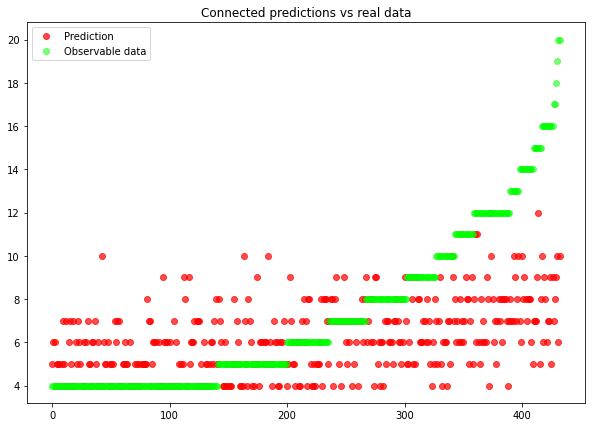

In [15]:
# K FOLD
present_results(SVR_predictions, y_main_true)

MAE: 3.2882121701235643
PearsonRResult(statistic=0.2666998173434987, pvalue=0.010605088031119281)


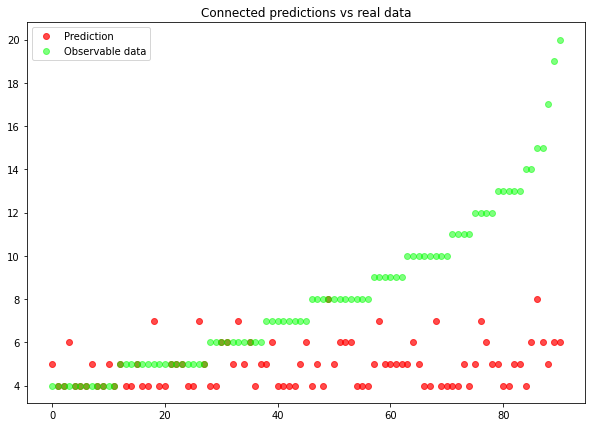

In [16]:
# EVAL DATASET
SVR_pilot_model = SVR_function
SVR_pilot_model.fit(X_main, y_main)
SVR_pilot_predictions = SVR_function.predict(X_pilot)
present_results(SVR_pilot_predictions, y_pilot)

NEURAL NETWORKS SECTION

In [17]:
import tensorflow as tf
import random as python_random

def create_model():
    np.random.seed(123)
    python_random.seed(123)
    tf.random.set_seed(1234)
    keras_model = tf.keras.Sequential([
                        tf.keras.layers.Dense(64, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                        tf.keras.layers.Dense(32, activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(units=1)
                        ])

    keras_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), loss='mean_absolute_error')
    return keras_model

In [18]:
keras_predictions = []

for train_index, test_index in kfold.split(X_main):
    X_train, X_test = X_main[train_index], X_main[test_index]
    y_train, y_test = y_main[train_index], y_main[test_index]
    
    model = create_model()
    model.fit(X_train, y_train, batch_size=64, epochs=200, verbose=0)
    keras_prediction = model.predict(X_test).flatten()

    keras_predictions = np.concatenate((keras_predictions, keras_prediction))
    print(stats.pearsonr(keras_prediction, y_test))
    
stats.pearsonr(y_main_true, keras_predictions)

2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.45649519458282123, pvalue=0.0018418264432598461)
2/2 [==============================] - 0s 0s/step
PearsonRResult(statistic=0.5566368763404254, pvalue=8.714339670524769e-05)
2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.571243099205797, pvalue=5.128258658018283e-05)
2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.3004607634973251, pvalue=0.05026602905636091)
2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.5351179762453737, pvalue=0.00021802022849224016)
2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.6089248720313127, pvalue=1.471928834788328e-05)
2/2 [==============================] - 0s 8ms/step
PearsonRResult(statistic=0.5709950510706364, pvalue=6.374242201890538e-05)
2/2 [==============================] - 0s 10ms/step
PearsonRResult(statistic=0.49521191678296156, pvalue=0.00073492

PearsonRResult(statistic=0.4592104144691441, pvalue=5.6725272561290936e-24)

MAE: 2.4704474246529453
PearsonRResult(statistic=0.4592104144691441, pvalue=5.6725272561290936e-24)


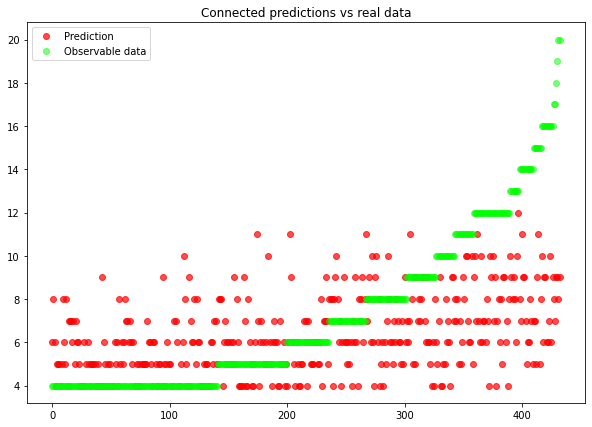

In [19]:
present_results(keras_predictions, y_main_true)

3/3 [==============================] - 0s 0s/step
MAE: 4.012464701474368
PearsonRResult(statistic=0.2869915983827975, pvalue=0.005812866397896812)


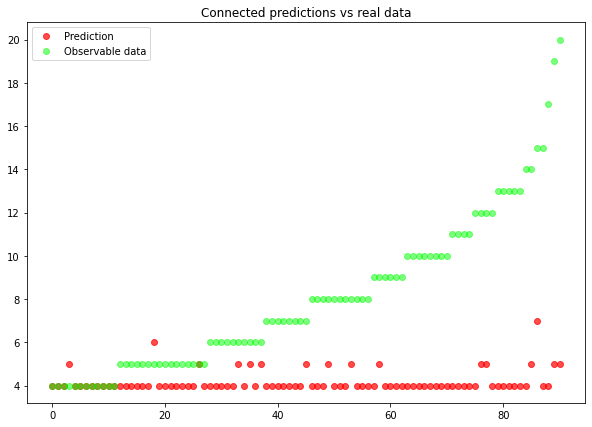

In [20]:
# EVAL DATASET

keras_eval_model = create_model()
keras_eval_model.fit(X_main, y_main, batch_size=64, epochs=200, verbose=0)
keras_pilot_predictions = keras_eval_model.predict(X_pilot).flatten()
present_results(keras_pilot_predictions, y_pilot)


CONNECTING RESULTS

MAE: 2.428875188389137
PearsonRResult(statistic=0.4875903298066905, pvalue=3.0614617422490212e-27)


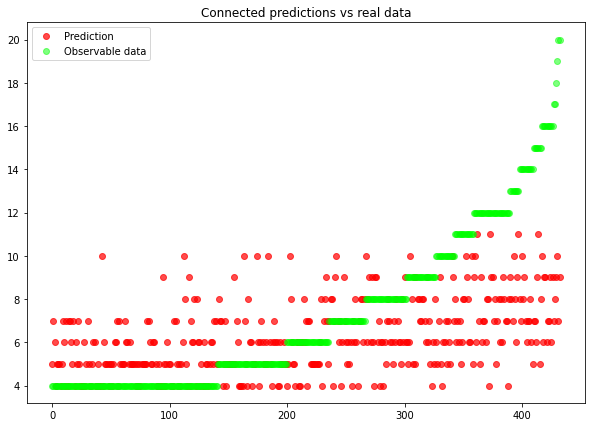

In [21]:
connected_main = [(k + s)/2 for k, s in zip(keras_predictions, SVR_predictions)]
present_results(connected_main, y_main_true)

MAE: 3.6025994323941752
PearsonRResult(statistic=0.28220881439783396, pvalue=0.006724102588255513)


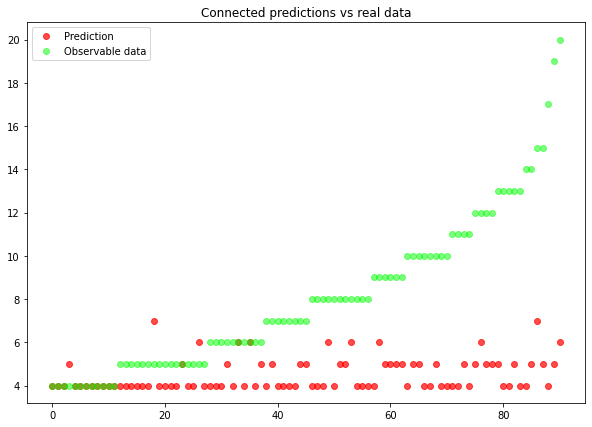

In [22]:
connected_eval = [(k + s)/2 for k, s in zip(keras_pilot_predictions, SVR_pilot_predictions)]
present_results(connected_eval, y_pilot)